In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.integrate import odeint

Solve the system ODEs:

In [2]:
a = 1.0 #initial position of mass (to the right of origin).

In [3]:
k = 1.0 #spring constant.
m = 1.0 #mass of spring.

In [4]:
def MassWithSpring(var, t, k, m):
    x, v = var
    var_dot = [v, -(k/m)*x]
    return var_dot

In [5]:
var0 = [0.5, 0.0] #IC of system.

In [6]:
NumOfAnim = 501

In [7]:
t = np.linspace(0, 20, NumOfAnim)

In [8]:
%%time
sol = odeint(MassWithSpring, var0, t, args=(k, m))

CPU times: user 2.23 ms, sys: 680 µs, total: 2.91 ms
Wall time: 2.56 ms


Set up the figure, axis, and the plot element we want to animate:

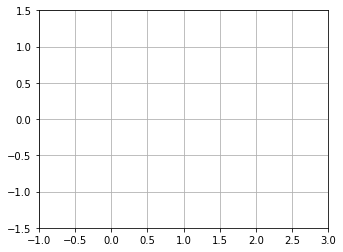

In [9]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ax.set_xlim((-1, 3))
ax.set_ylim((-1.5, 1.5))

ax.grid(True)

# Mass, string and text:
MyMass, = ax.plot([], [], "rs-", ms=10, lw=2, zorder=2)
MyString, = ax.plot([], [], "k.-", lw=2, zorder=1)
MyText = ax.text(0, 0, '', transform=ax.transAxes)
# NOTE THE POSITION OF MyText!!!

Define the initialization function, which plots the background of each frame:

In [10]:
def init():
    MyMass.set_data([], [])
    MyString.set_data([], [])
    MyText.set_text('')
    return (MyMass, MyString, MyText)

Define the animation function, which is called for each new frame:

In [11]:
def animate(i):
    
    x = a + sol[i,0]
    y = 0.
    
    xData = np.array([0, x])
    yData = np.array([0, y])
    
    MyMass.set_data(x, y)
    MyString.set_data(xData, yData)
    MyText.set_text('x={:.2f}, y={:.2f}'.format(x, y))
    
    return (MyMass, MyString, MyText)

Compile the animation. Setting ```blit=True``` will only redraw parts that have changed:

In [12]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0, NumOfAnim),
                               interval=20,
                               blit=True, repeat=False)

In [13]:
%%time
HTML(anim.to_jshtml())

CPU times: user 29.1 s, sys: 652 ms, total: 29.8 s
Wall time: 30.1 s
